In [1]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

model.add(Conv2D(10, kernel_size=(3, 3), activation="sigmoid", input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train.reshape(60000, 28, 28, 1), y_train, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 3s 46ms/step - loss: 1.3541 - accuracy: 0.6292
Epoch 2/10
60/60 [==============================] - 3s 46ms/step - loss: 0.6311 - accuracy: 0.7756
Epoch 3/10
60/60 [==============================] - 3s 47ms/step - loss: 0.5070 - accuracy: 0.8204
Epoch 4/10
60/60 [==============================] - 3s 50ms/step - loss: 0.4488 - accuracy: 0.8399
Epoch 5/10
60/60 [==============================] - 3s 49ms/step - loss: 0.4119 - accuracy: 0.8530
Epoch 6/10
60/60 [==============================] - 3s 48ms/step - loss: 0.3919 - accuracy: 0.8592
Epoch 7/10
60/60 [==============================] - 3s 49ms/step - loss: 0.3640 - accuracy: 0.8670
Epoch 8/10
60/60 [==============================] - 3s 48ms/step - loss: 0.3457 - accuracy: 0.8743
Epoch 9/10
60/60 [==============================] - 3s 49ms/step - loss: 0.3321 - accuracy: 0.8800
Epoch 10/10
60/60 [==============================] - 3s 49ms/step - loss: 0.3137 - accuracy: 0.8862


In [3]:
model2 = Sequential()

model2.add(Conv2D(10, 
                  kernel_size=(3, 3), 
                  activation="sigmoid", 
                  input_shape=(28, 28, 1), 
                  weights=model.layers[0].get_weights()))

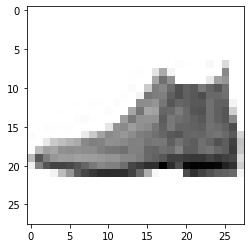

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(X_test[0], cmap="gray_r")
plt.show()

In [5]:
result = model2.predict(X_test[0].reshape(1, 28, 28, 1))

In [6]:
result.shape

(1, 26, 26, 10)

In [7]:
result[0].shape

(26, 26, 10)

In [8]:
result[0][:, :, 0]

array([[4.22133058e-01, 4.22133058e-01, 4.22133058e-01, 4.22133058e-01,
        4.22133058e-01, 4.22133058e-01, 4.22133058e-01, 4.22133058e-01,
        4.22133058e-01, 4.22133058e-01, 4.22133058e-01, 4.22133058e-01,
        4.22133058e-01, 4.22133058e-01, 4.22133058e-01, 4.22133058e-01,
        4.22133058e-01, 4.22133058e-01, 4.22133058e-01, 4.22133058e-01,
        4.22133058e-01, 4.22133058e-01, 4.22133058e-01, 4.22133058e-01,
        4.22133058e-01, 4.22133058e-01],
       [4.22133058e-01, 4.22133058e-01, 4.22133058e-01, 4.22133058e-01,
        4.22133058e-01, 4.22133058e-01, 4.22133058e-01, 4.22133058e-01,
        4.22133058e-01, 4.22133058e-01, 4.22133058e-01, 4.22133058e-01,
        4.22133058e-01, 4.22133058e-01, 4.22133058e-01, 4.22133058e-01,
        4.22133058e-01, 4.22133058e-01, 4.22133058e-01, 4.22133058e-01,
        4.22133058e-01, 4.22133058e-01, 4.22133058e-01, 4.22133058e-01,
        4.22133058e-01, 4.22133058e-01],
       [4.22133058e-01, 4.22133058e-01, 4.22133058e-01

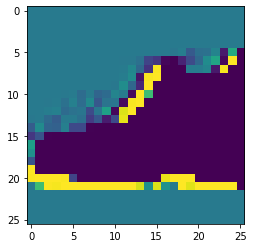

In [19]:
plt.imshow(result[0][:, :, 7])
plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model3 = Sequential()

model3.add(Conv2D(10, kernel_size=(3, 3), activation="sigmoid", input_shape=(28, 28, 1)))
model3.add(Conv2D(10, kernel_size=(3, 3), activation="sigmoid"))
model3.add(Flatten())
model3.add(Dense(10, activation="softmax"))

model3.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model3.fit(X_train.reshape(60000, 28, 28, 1), y_train, epochs=1, batch_size=1000)

60/60 [==============================] - 8s 139ms/step - loss: 2.1771 - accuracy: 0.3817
